In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Name: Noam Marko

ID: 205684921

Kaggle_User: https://www.kaggle.com/noammarko

## Exp:
In this competition we need to build a modle that will predict for us which of the passengers survived the Titanic shipwreck with minimum error using the given data.
We will clean the features and drop irrelevant information so we will have an easier time using the data to our benefit. 
In addition of cleaning and dropping features, we might add new features that we can find useful to the prediction of the survival of the passenger.
Afterwards we will create graphs and plots of the features to help us understand the connection between features, and if we have another combination of features that we can use.
At the end of the notebook we will use different kind of modles (SGD, MLP etc.) and compair the results we got from the different modles.

In [2]:
!pip install --upgrade pandas_profiling
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
!pip install --upgrade plotly
!git clone https://github.com/qiaochen/CourseExercises


     |████████████████████████████████| 266kB 6.0MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 3.1MB 20.4MB/s 
     |████████████████████████████████| 604kB 44.4MB/s 
     |████████████████████████████████| 296kB 45.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=3fb7d303464e3b33d8f13e459879dbc34b14116eb242ecf3fab4374ab975bb07
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1
--2021-01-05 09:28:12--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage
Resolvin

In [3]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm.auto import tqdm


# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer

from CourseExercises.lwlr import LWLR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [4]:
train_df = pd.read_csv('/content/train (1).csv')
test_df = pd.read_csv('/content/test (1).csv')

full_data = pd.concat([train_df, test_df], sort = True).reset_index(drop = True)
full_data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


# Creating new features that might help in the future.
# Filling all Nan cells
# Replacing all the data to be numeric

In [5]:
# Splitting the 'Sex' column into 'Men' and 'Women' columns. 
full_data['Sex'] = full_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
full_data['Men'] = full_data['Sex'].map( {0: 0, 1: 1} ).astype(int)
full_data['Women'] = full_data['Sex'].map( {0: 1, 1: 0} ).astype(int)

# filling in the mean of the 'Age' column to every null cell. Doing the same to the 'Fare' column
full_data['Age'] = full_data['Age'].fillna(full_data['Age'].mean())
full_data['Fare'] = full_data['Fare'].fillna(full_data['Fare'].mean())

# Creating a new feature - 'FamilySize', if the size of the cell = 1 the passenger is alone
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch'] + 1 # 1 to add the person himself to the size of the family


# Replacing all empty cells with 'S' and then performing one-hot encoding.
full_data['Embarked'] = full_data['Embarked'].fillna('S')



# Creating new feature
This next piece of code has been taken from the notebook https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#2.-Feature-Engineering

It clasiffies the passengers into sections (decks, most passengers have a Cabin number that has a letter followed by numbers. The letter is the section, or deck if you will, that the passenger is in). This feature indicates where is the area of the passenger and might help us predict if the passenger survived.

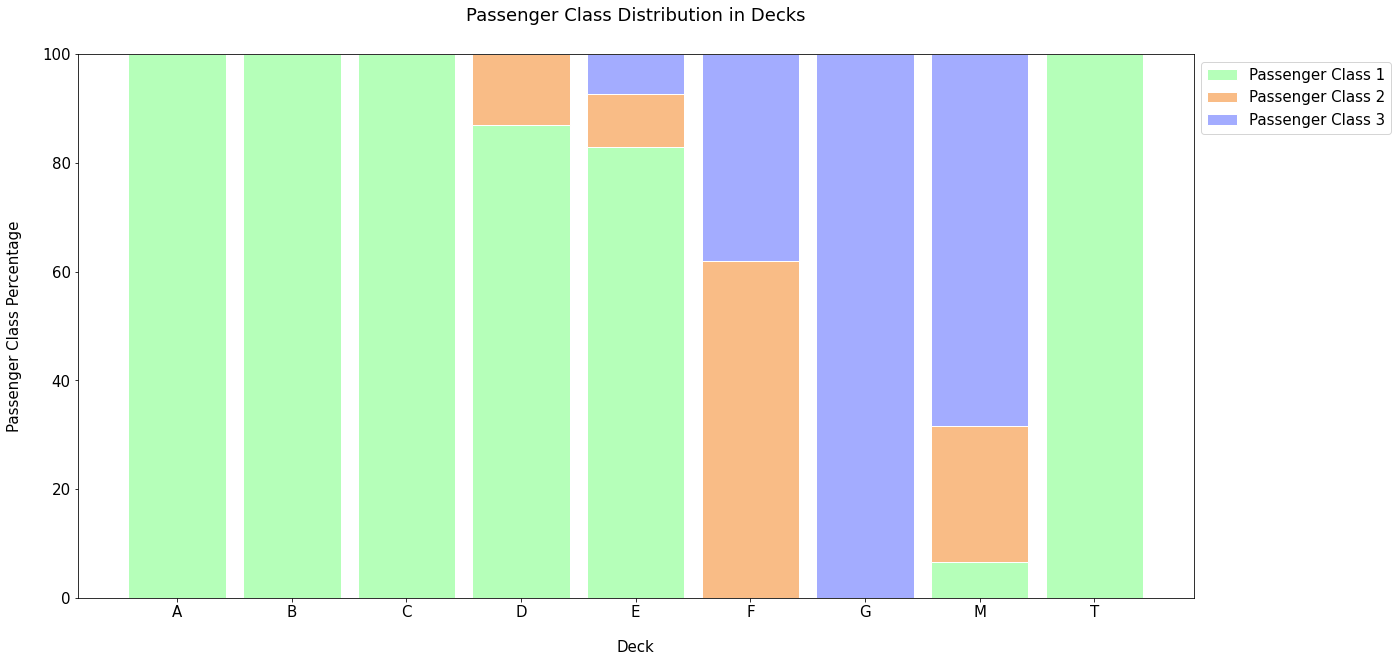

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [6]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
full_data['Deck'] = full_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = full_data.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)
idx = full_data[full_data['Deck'] == 'T'].index
full_data.loc[idx, 'Deck'] = 'A'
full_data['Deck'] = full_data['Deck'].replace(['A', 'B', 'C'], 'ABC')
full_data['Deck'] = full_data['Deck'].replace(['D', 'E'], 'DE')
full_data['Deck'] = full_data['Deck'].replace(['F', 'G'], 'FG')

full_data['Deck'].value_counts()

In [7]:
# saving the dataframe for later (EX3)
train_df_EX3, test_df_EX3 = full_data.loc[:890], full_data.loc[891:].drop(['Survived'], axis = 1)

# Analysis
As we can see from the chart above, the passengers that are on deck A, B and C are all from Class 1, M stands for missing (i.e has no Cabin number). Every other deck is mixed with different passengers from different classes. Deck G has only 3rd class passengers, and deck T has one passenger from Class 1, so we combine between Deck T and A.

# We'll perform one-hot encoding to the 'Deck' column, like we did to 'Embarked' and 'Pclass'

In [8]:
one_hot = pd.get_dummies(full_data['Deck'], prefix='Deck')
full_data = full_data.join(one_hot)

one_hot = pd.get_dummies(full_data['Embarked'], prefix='Embarked')
full_data = full_data.join(one_hot)

one_hot = pd.get_dummies(full_data['Pclass'], prefix='Pclass')
full_data = full_data.join(one_hot)

display(full_data)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Men,Women,FamilySize,Deck,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,1,0,2,M,0,0,0,1,0,0,1,0,0,1
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,1,2,ABC,1,0,0,0,1,0,0,1,0,0
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,1,1,M,0,0,0,1,0,0,1,0,0,1
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,1,2,ABC,1,0,0,0,0,0,1,1,0,0
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,1,0,1,M,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236,1,0,1,M,0,0,0,1,0,0,1,0,0,1
1305,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758,0,1,1,ABC,1,0,0,0,1,0,0,1,0,0
1306,38.500000,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262,1,0,1,M,0,0,0,1,0,0,1,0,0,1
1307,29.881138,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,1,0,1,M,0,0,0,1,0,0,1,0,0,1


# Now that we have all the passengers and which deck they are in, we can create boolian variables to help us predict the survival of the passengers.

# Splitting the data back to test and train and dropping irrelevant columns.

In [9]:
train_df, test_df = full_data.loc[:890], full_data.loc[891:].drop(['Survived'], axis = 1)

In [10]:
passenger_test_col = test_df['PassengerId'].copy(deep=True)

drop_elements = ['PassengerId', 'Name', 'Embarked', 'Ticket', 'Cabin', 'Deck']
train_df = train_df.drop(drop_elements, axis = 1)
test_df = test_df.drop(drop_elements, axis = 1)

In [11]:
train_df

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.000000,7.2500,0,3,1,1,0.0,1,0,2,0,0,0,1,0,0,1,0,0,1
1,38.000000,71.2833,0,1,0,1,1.0,0,1,2,1,0,0,0,1,0,0,1,0,0
2,26.000000,7.9250,0,3,0,0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1
3,35.000000,53.1000,0,1,0,1,1.0,0,1,2,1,0,0,0,0,0,1,1,0,0
4,35.000000,8.0500,0,3,1,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,2,1,0,0.0,1,0,1,0,0,0,1,0,0,1,0,1,0
887,19.000000,30.0000,0,1,0,0,1.0,0,1,1,1,0,0,0,0,0,1,1,0,0
888,29.881138,23.4500,2,3,0,1,0.0,0,1,4,0,0,0,1,0,0,1,0,0,1
889,26.000000,30.0000,0,1,1,0,1.0,1,0,1,1,0,0,0,1,0,0,1,0,0


# Creating a graph to show the connection between survival and family size

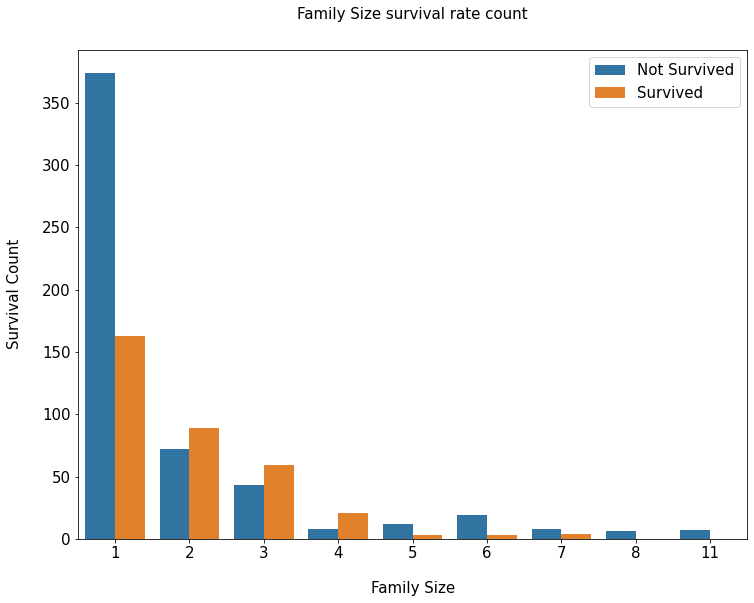

In [12]:
fig, axs = plt.subplots(figsize=(12, 9))

sns.countplot(x='FamilySize', hue='Survived', data=train_df)

plt.xlabel('Family Size', size=15, labelpad=20)
plt.ylabel('Survival Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Family Size survival rate count', size=15, y=1.05)

plt.show()


# As we can clearly see, passengers with family size between 2 and 4 had a better survival precentage. 

In [13]:
test_df

,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
891,34.500000,7.8292,0,3,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
892,47.000000,7.0000,0,3,0,1,0,1,2,0,0,0,1,0,0,1,0,0,1
893,62.000000,9.6875,0,2,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
894,27.000000,8.6625,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
895,22.000000,12.2875,1,3,0,1,0,1,3,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,29.881138,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
1305,39.000000,108.9000,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0
1306,38.500000,7.2500,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
1307,29.881138,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


# Checking for any NULL columns

In [14]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
display_missing(train_df)
display_missing(test_df)
    

Age column missing values: 0
Fare column missing values: 0
Parch column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Men column missing values: 0
Women column missing values: 0
FamilySize column missing values: 0
Deck_ABC column missing values: 0
Deck_DE column missing values: 0
Deck_FG column missing values: 0
Deck_M column missing values: 0
Embarked_C column missing values: 0
Embarked_Q column missing values: 0
Embarked_S column missing values: 0
Pclass_1 column missing values: 0
Pclass_2 column missing values: 0
Pclass_3 column missing values: 0


Age column missing values: 0
Fare column missing values: 0
Parch column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Men column missing values: 0
Women column missing values: 0
FamilySize column missing values: 0
Deck_ABC column missing values: 0
Deck_DE column missing values: 0

# Heat Map 

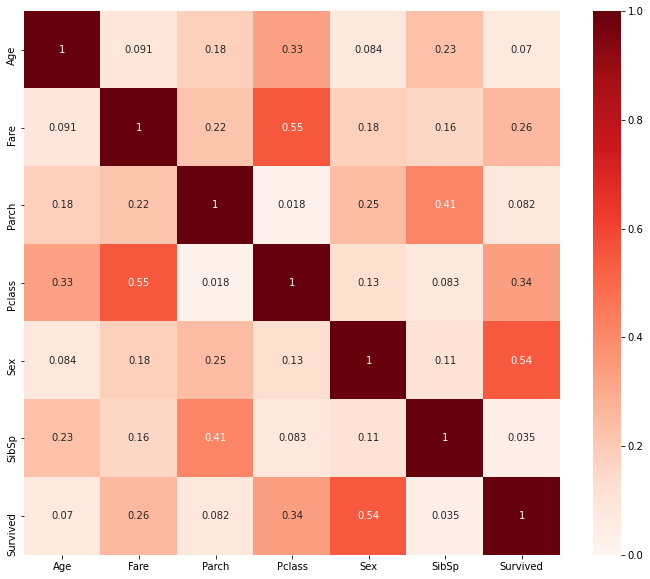

In [15]:
df = train_df.copy(deep=True)
drop_elem = ['Embarked_S', 'Embarked_C', 'Embarked_Q', 'Deck_ABC', 'Deck_DE', 'Deck_FG', 'Deck_M', 'Men', 'Women', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySize']
df = df.drop(drop_elem, axis = 1)
plt.figure(figsize=(12,10))
cor = np.abs(df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

# Analysis
We can understand from this plot that not too many features are correlated with one another. This means that most of our data in the traning set is uniqe.

# Now we will create a pairolot, for the purpose of finding out if there is distribution of data from one feature to another.

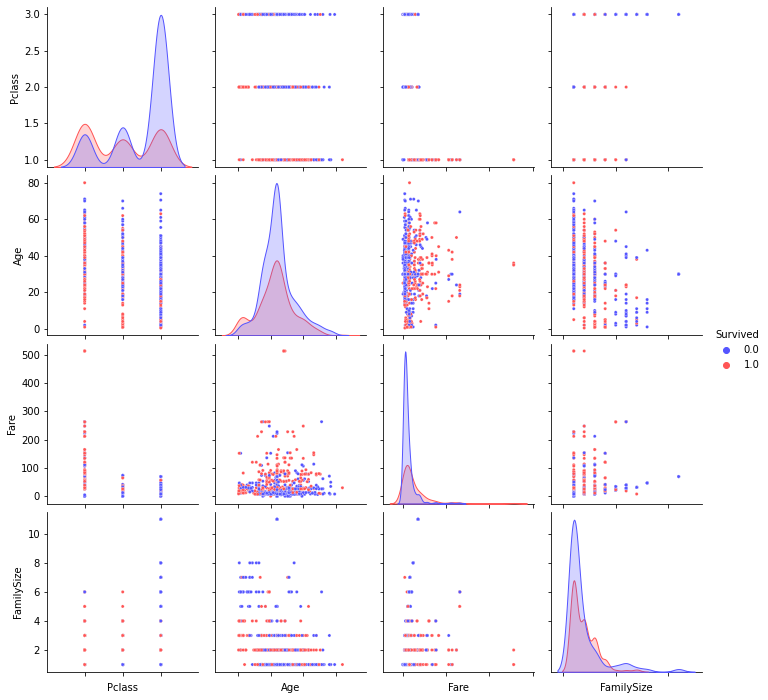

In [16]:
pair = sns.pairplot(train_df[[u'Survived', u'Pclass', u'Age', u'Fare',
       u'FamilySize']], hue = 'Survived', palette = 'seismic',
                   height = 2.5, diag_kind = 'kde', diag_kws = dict(shade = True),
                    plot_kws = dict (s=10))
pair.set(xticklabels=[])

# Analysis 
According to the pairplot we performed, it seems like more passengers survived the shipwreck rather than didn't survive. I beleive the reason it SEEMS this way is because the red dots (survived) and the blue dots (didn't survive) are mixed up together and we can't see the clear picture.

# Now we'll split the train data, and use different modles to determine which one gives us the best result.

In [17]:
temp_df = train_df.copy(deep=True)
t = temp_df['Survived']
x = temp_df.drop('Survived', axis = 1)

X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(x, t, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

X_train


,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
30,40.000000,27.7208,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
10,4.000000,16.7000,1,3,0,1,0,1,3,0,0,1,0,0,0,1,0,0,1
873,47.000000,9.0000,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
182,9.000000,31.3875,2,3,1,4,1,0,7,0,0,0,1,0,0,1,0,0,1
876,20.000000,9.8458,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,30.000000,8.6625,0,3,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1
584,29.881138,8.7125,0,3,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1
493,71.000000,49.5042,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
527,29.881138,221.7792,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0



t_train


30     0.0
10     1.0
873    0.0
182    0.0
876    0.0
      ... 
534    0.0
584    0.0
493    0.0
527    0.0
168    0.0
Name: Survived, Length: 712, dtype: float64


X_test


,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
707,42.000000,26.2875,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0
37,21.000000,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
615,24.000000,65.0000,2,2,0,1,0,1,4,0,0,0,1,0,0,1,0,1,0
169,28.000000,56.4958,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
68,17.000000,7.9250,2,3,0,4,0,1,7,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,24.000000,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
80,22.000000,9.0000,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
846,29.881138,69.5500,2,3,1,8,1,0,11,0,0,0,1,0,0,1,0,0,1
870,26.000000,7.8958,0,3,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1



t_test


707    1.0
37     0.0
615    1.0
169    0.0
68     1.0
      ... 
89     0.0
80     0.0
846    0.0
870    0.0
251    0.0
Name: Survived, Length: 179, dtype: float64

# We'll try to predict who survived based on our datasets and features.

In [18]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.76258242 0.23741758]
 [0.15758971 0.84241029]
 [0.96920418 0.03079582]
 [0.96154019 0.03845981]
 [0.89546746 0.10453254]]

first 5 predictions of y_train:
[0. 1. 0. 0. 0.]

first 5 probabilities of y_test_prob:
[[0.46348342 0.53651658]
 [0.90038106 0.09961894]
 [0.22575839 0.77424161]
 [0.91600245 0.08399755]
 [0.69704904 0.30295096]]

first 5 predictions of y_test:
[1. 0. 1. 0. 0.]


In [19]:
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8230337078651685
Accuracy score on test 0.8044692737430168

CE on train 0.41739926318380716
CE on test 0.506032159761359


# As we see our accuracy is decent, yet our CE isn't as low as we hoped for.

# Different kind of modle is the neural network

In [20]:
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8174157303370787
Accuracy score on test 0.7597765363128491

CE on train 0.42410094278461236
CE on test 0.5049895389861258


# Comparison
Comparing the two modles (Neural Network vs. SGD), we can see we get better accuracy using SGD.

# Now we'll take out some features, to see whether or not they were helpful in predicting who survived the titanic

In [21]:
temp2_df = train_df.copy(deep = True)
t = temp2_df['Survived']
elem_drop = ['Survived','Deck_ABC', 'Deck_DE', 'Deck_FG', 'Deck_M']
x = temp2_df.drop(elem_drop, axis = 1)

X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(x, t, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

X_train


,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
30,40.000000,27.7208,0,1,1,0,1,0,1,1,0,0,1,0,0
10,4.000000,16.7000,1,3,0,1,0,1,3,0,0,1,0,0,1
873,47.000000,9.0000,0,3,1,0,1,0,1,0,0,1,0,0,1
182,9.000000,31.3875,2,3,1,4,1,0,7,0,0,1,0,0,1
876,20.000000,9.8458,0,3,1,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,30.000000,8.6625,0,3,0,0,0,1,1,0,0,1,0,0,1
584,29.881138,8.7125,0,3,1,0,1,0,1,1,0,0,0,0,1
493,71.000000,49.5042,0,1,1,0,1,0,1,1,0,0,1,0,0
527,29.881138,221.7792,0,1,1,0,1,0,1,0,0,1,1,0,0



t_train


30     0.0
10     1.0
873    0.0
182    0.0
876    0.0
      ... 
534    0.0
584    0.0
493    0.0
527    0.0
168    0.0
Name: Survived, Length: 712, dtype: float64


X_test


,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
707,42.000000,26.2875,0,1,1,0,1,0,1,0,0,1,1,0,0
37,21.000000,8.0500,0,3,1,0,1,0,1,0,0,1,0,0,1
615,24.000000,65.0000,2,2,0,1,0,1,4,0,0,1,0,1,0
169,28.000000,56.4958,0,3,1,0,1,0,1,0,0,1,0,0,1
68,17.000000,7.9250,2,3,0,4,0,1,7,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,24.000000,8.0500,0,3,1,0,1,0,1,0,0,1,0,0,1
80,22.000000,9.0000,0,3,1,0,1,0,1,0,0,1,0,0,1
846,29.881138,69.5500,2,3,1,8,1,0,11,0,0,1,0,0,1
870,26.000000,7.8958,0,3,1,0,1,0,1,0,0,1,0,0,1



t_test


707    1.0
37     0.0
615    1.0
169    0.0
68     1.0
      ... 
89     0.0
80     0.0
846    0.0
870    0.0
251    0.0
Name: Survived, Length: 179, dtype: float64

In [22]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.53706174 0.46293826]
 [0.27873554 0.72126446]
 [0.96778358 0.03221642]
 [0.96317645 0.03682355]
 [0.89884202 0.10115798]]

first 5 predictions of y_train:
[0. 1. 0. 0. 0.]

first 5 probabilities of y_test_prob:
[[0.69009491 0.30990509]
 [0.90328774 0.09671226]
 [0.18287349 0.81712651]
 [0.91824737 0.08175263]
 [0.70638617 0.29361383]]

first 5 predictions of y_test:
[0. 0. 1. 0. 0.]


In [23]:
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8160112359550562
Accuracy score on test 0.7932960893854749

CE on train 0.42509222999539525
CE on test 0.5120867577447482


# Side note 
As we can see, after dropping the features that with them we can tell where on the Titanic the passengers where staying we got a really close result to the one where we included those features. Thus, we understand that those features didn't help us predict any better which passenger survived.

In [24]:
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8188202247191011
Accuracy score on test 0.7653631284916201

CE on train 0.4241104375710007
CE on test 0.5086488428009436


# Let us check if any other features were relevant to our prediction

In [25]:
temp3_df = train_df.copy(deep = True)
t = temp3_df['Survived']
elem_drop = ['Survived','Embarked_S', 'Embarked_C', 'Embarked_Q']
x = temp3_df.drop(elem_drop, axis = 1)

X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(x, t, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

X_train


,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Pclass_1,Pclass_2,Pclass_3
30,40.000000,27.7208,0,1,1,0,1,0,1,0,0,0,1,1,0,0
10,4.000000,16.7000,1,3,0,1,0,1,3,0,0,1,0,0,0,1
873,47.000000,9.0000,0,3,1,0,1,0,1,0,0,0,1,0,0,1
182,9.000000,31.3875,2,3,1,4,1,0,7,0,0,0,1,0,0,1
876,20.000000,9.8458,0,3,1,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,30.000000,8.6625,0,3,0,0,0,1,1,0,0,0,1,0,0,1
584,29.881138,8.7125,0,3,1,0,1,0,1,0,0,0,1,0,0,1
493,71.000000,49.5042,0,1,1,0,1,0,1,0,0,0,1,1,0,0
527,29.881138,221.7792,0,1,1,0,1,0,1,1,0,0,0,1,0,0



t_train


30     0.0
10     1.0
873    0.0
182    0.0
876    0.0
      ... 
534    0.0
584    0.0
493    0.0
527    0.0
168    0.0
Name: Survived, Length: 712, dtype: float64


X_test


,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Pclass_1,Pclass_2,Pclass_3
707,42.000000,26.2875,0,1,1,0,1,0,1,0,1,0,0,1,0,0
37,21.000000,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1
615,24.000000,65.0000,2,2,0,1,0,1,4,0,0,0,1,0,1,0
169,28.000000,56.4958,0,3,1,0,1,0,1,0,0,0,1,0,0,1
68,17.000000,7.9250,2,3,0,4,0,1,7,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,24.000000,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1
80,22.000000,9.0000,0,3,1,0,1,0,1,0,0,0,1,0,0,1
846,29.881138,69.5500,2,3,1,8,1,0,11,0,0,0,1,0,0,1
870,26.000000,7.8958,0,3,1,0,1,0,1,0,0,0,1,0,0,1



t_test


707    1.0
37     0.0
615    1.0
169    0.0
68     1.0
      ... 
89     0.0
80     0.0
846    0.0
870    0.0
251    0.0
Name: Survived, Length: 179, dtype: float64

In [26]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.78226383 0.21773617]
 [0.2131298  0.7868702 ]
 [0.96294346 0.03705654]
 [0.96410228 0.03589772]
 [0.87248808 0.12751192]]

first 5 predictions of y_train:
[0. 1. 0. 0. 0.]

first 5 probabilities of y_test_prob:
[[0.45258304 0.54741696]
 [0.87862668 0.12137332]
 [0.1873712  0.8126288 ]
 [0.89420126 0.10579874]
 [0.73961776 0.26038224]]

first 5 predictions of y_test:
[1. 0. 1. 0. 0.]


In [27]:
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8230337078651685
Accuracy score on test 0.7877094972067039

CE on train 0.4198931753412783
CE on test 0.5073533475603597


In [28]:
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8047752808988764
Accuracy score on test 0.770949720670391

CE on train 0.4227364705118292
CE on test 0.5049212714765636


# Summary
After all the modle testing, we understand that the best modle to use for the prediction of the survival of passengers who were on the titanic is the SGD with all of the features still in the dataframe (without dropping some of the features). It gave us an accuracy of 81 on the test, while on the other tests we dropped some features ('Deck', 'Embarked') and the accuracy dropped as well.

In [29]:
display(X_test)

,Age,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Pclass_1,Pclass_2,Pclass_3
707,42.000000,26.2875,0,1,1,0,1,0,1,0,1,0,0,1,0,0
37,21.000000,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1
615,24.000000,65.0000,2,2,0,1,0,1,4,0,0,0,1,0,1,0
169,28.000000,56.4958,0,3,1,0,1,0,1,0,0,0,1,0,0,1
68,17.000000,7.9250,2,3,0,4,0,1,7,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,24.000000,8.0500,0,3,1,0,1,0,1,0,0,0,1,0,0,1
80,22.000000,9.0000,0,3,1,0,1,0,1,0,0,0,1,0,0,1
846,29.881138,69.5500,2,3,1,8,1,0,11,0,0,0,1,0,0,1
870,26.000000,7.8958,0,3,1,0,1,0,1,0,0,0,1,0,0,1


In [30]:
display(train_df)

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,Men,Women,FamilySize,Deck_ABC,Deck_DE,Deck_FG,Deck_M,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.000000,7.2500,0,3,1,1,0.0,1,0,2,0,0,0,1,0,0,1,0,0,1
1,38.000000,71.2833,0,1,0,1,1.0,0,1,2,1,0,0,0,1,0,0,1,0,0
2,26.000000,7.9250,0,3,0,0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1
3,35.000000,53.1000,0,1,0,1,1.0,0,1,2,1,0,0,0,0,0,1,1,0,0
4,35.000000,8.0500,0,3,1,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,2,1,0,0.0,1,0,1,0,0,0,1,0,0,1,0,1,0
887,19.000000,30.0000,0,1,0,0,1.0,0,1,1,1,0,0,0,0,0,1,1,0,0
888,29.881138,23.4500,2,3,0,1,0.0,0,1,4,0,0,0,1,0,0,1,0,0,1
889,26.000000,30.0000,0,1,1,0,1.0,1,0,1,1,0,0,0,1,0,0,1,0,0


Creating a function that'll return the error.

In [31]:
def loss_to_graph(x,t, test_size):
    X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(x, t, test_size=test_size, random_state=2)
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
    y_train_prob = SGD_cls.predict_proba(X_train)
    y_test_prob = SGD_cls.predict_proba(X_test)
    y_train = SGD_cls.predict(X_train)
    y_test = SGD_cls.predict(X_test)
    return metrics.log_loss(t_train, y_train_prob)
    

,Loss,t
0,0.426140,0.05
1,0.423503,0.15
2,0.430688,0.25
3,0.423085,0.35
4,0.420920,0.45
5,0.431444,0.55
6,0.430618,0.65
7,0.431446,0.75
8,0.379111,0.85
9,0.210699,0.95


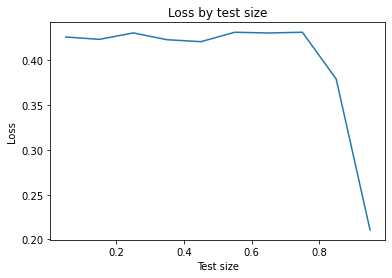

In [32]:
final_df = train_df.copy(deep = True)
t = final_df['Survived']
elem_drop = ['Survived']
x = final_df.drop(elem_drop, axis = 1)
test_size = 0.05
graph = {'Loss':[], 't':[]}
graph_df = pd.DataFrame(data=graph)
for i in range(10):
    l = loss_to_graph(x,t,test_size)
    graph_df = graph_df.append({'Loss': l, 't': test_size}, ignore_index = True)
    test_size += 0.1

display(graph_df)
plt.title('Loss by test size')
plt.ylabel('Loss')
plt.xlabel('Test size')
plt.plot(graph_df['t'], graph_df['Loss'])
plt.show()


# Analysis
We can learn from the graph that up until test_size < 0.8 the CE is in between 0.42-0.43.
When the test_size >= 0.8 we can see that the CE drops to the area of 0.2. Maybe the reason is that the modle doesn't get enough data to work with thus have less room for error.

# Final SGD with all of the features

In [33]:
final_df = train_df.copy(deep = True)
t = final_df['Survived']
elem_drop = ['Survived']
x = final_df.drop(elem_drop, axis = 1)

X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(x, t, test_size=0.2, random_state=2)

t_train = train_df['Survived']
x_train = train_df.drop('Survived', axis = 1)
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(x_train, t_train)
y_predict = SGD_cls.predict(test_df)
y_predict = y_predict.astype('int32')

submission = pd.DataFrame({'PassengerId': passenger_test_col,
                     'Survived': y_predict 
    })
submission.to_csv('submission.csv', index= False)

display(y_predict)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Leaderboard
My place 14,166th

![image](https://user-images.githubusercontent.com/59430912/99393836-99a13480-28e6-11eb-8671-344b37fbc382.png)

# Conclusion
To sum up the exercise, after loading the data and studying it, I started creating new features that could have had an influence on the survival of the passenger. 
Although not all the new features that I've added helped(the feature embarked for example, didn't play an important role in the survival of the passenger), we did see that there was a higher chance of survival if the passenger was in Pclass_1.

Source list:

1) https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#2.-Feature-Engineering

2) https://www.kaggle.com/startupsci/titanic-data-science-solutions

3)https://github.com/aviasd/Machine-Learning-Practices-Afeka-2020/blob/main/FirstPracticeML.html

4) https://github.com/aviasd/Machine-Learning-Practices-Afeka-2020/blob/main/SecondPracticeML.html

# **----------------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------------**

# **Exercise 3**

After we have learned new techniques to improve our predictions, we will apply those techniques and try to get better results for our prediction.

In [34]:
train_df_EX3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    int64  
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Men          891 non-null    int64  
 13  Women        891 non-null    int64  
 14  FamilySize   891 non-null    int64  
 15  Deck         891 non-null    object 
dtypes: float64(3), int64(8), object(5)
memory usage: 111.5+ KB


In [35]:
t = train_df['Survived'].copy()
elem_drop = ['Survived', 'Name', 'PassengerId', 'Cabin', 'Ticket']
test_df = test_df_EX3.drop(columns= ['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)
x = train_df_EX3.drop(elem_drop, axis=1).copy()
print('t')
display(t)
print()
print('X')
display(x)

t


0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64


X


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Men,Women,FamilySize,Deck
0,22.000000,S,7.2500,0,3,1,1,1,0,2,M
1,38.000000,C,71.2833,0,1,0,1,0,1,2,ABC
2,26.000000,S,7.9250,0,3,0,0,0,1,1,M
3,35.000000,S,53.1000,0,1,0,1,0,1,2,ABC
4,35.000000,S,8.0500,0,3,1,0,1,0,1,M
...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,S,13.0000,0,2,1,0,1,0,1,M
887,19.000000,S,30.0000,0,1,0,0,0,1,1,ABC
888,29.881138,S,23.4500,2,3,0,1,0,1,4,M
889,26.000000,C,30.0000,0,1,1,0,1,0,1,ABC


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Embarked    891 non-null    object 
 2   Fare        891 non-null    float64
 3   Parch       891 non-null    int64  
 4   Pclass      891 non-null    int64  
 5   Sex         891 non-null    int64  
 6   SibSp       891 non-null    int64  
 7   Men         891 non-null    int64  
 8   Women       891 non-null    int64  
 9   FamilySize  891 non-null    int64  
 10  Deck        891 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [37]:
x['Age'] = x['Age'].astype('int64')

In [38]:
import tensorflow as tf
categorical_cols = x.select_dtypes(include=['object', 'bool']).columns
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

print("\nNumerical:\t", numerical_cols)
print("\nCategorical:\t", categorical_cols)


Numerical:	 Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Men', 'Women',
       'FamilySize'],
      dtype='object')

Categorical:	 Index(['Embarked', 'Deck'], dtype='object')


In [39]:
ct = ColumnTransformer([
    ("encoding_cat", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard_poly", make_pipeline(PolynomialFeatures(degree=2), StandardScaler()), numerical_cols)],
    remainder='passthrough')

In [40]:
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared = False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared = False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [41]:


def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [42]:
model_pipe = make_pipeline(ct, SGDClassifier(loss='log', random_state=2))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(x, t, model_pipe, k=10, show_score_loss_graphs=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

As we can see from the graph the CV score isn't very high.

We'll try using different kind of ways to increase the score (like Hyper-Parameters, feature selection).

Furthuer more, we'll test different kinds of models and use the one that gives us the best result.

---

# Grid Search vs. Random Search

In [43]:
hyper_params = { 'penalty': ('l1', 'l2', 'elasticnet'),
                    'alpha': [0.1, 0.01, 0.001, 0.0001],
                    'max_iter': [1000, 500],
                    'learning_rate': ('constant', 'optimal', 'invscaling', 'adaptive'),
                    'eta0': [0.1, 0.01, 0.001, 0.0001]}
X_encoded = pd.DataFrame(ct.fit_transform(x))

gs_model = GridSearchCV(SGDClassifier(loss='log', random_state=2), hyper_params).fit(X_encoded, t)
print('grid search score:', gs_model.best_score_)
print('grid search params:', gs_model.best_params_)

grid search score: 0.830525390747599
grid search params: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l2'}


In [44]:
# train with random search and get best parameters
np.random.seed(1)
distributions = dict(alpha=uniform(loc=0, scale=1), penalty=['l2', 'l1', 'elasticnet'])

rs_model = RandomizedSearchCV(SGDClassifier(), hyper_params, random_state=1).fit(X_encoded, t)
print('rs_model', rs_model.best_score_)
print('best params', rs_model.best_params_)

rs_model 0.8271420500910175
best params {'penalty': 'l2', 'max_iter': 1000, 'learning_rate': 'optimal', 'eta0': 0.01, 'alpha': 0.01}


The Grid search provides us with a slightly better score.

Therefore we will use it in the rest of the notebook.

*NOTE: The Random search may provide us better results, with a different seed.

## Feature Selection

In [45]:
selector = RFECV(SGDClassifier(loss='log', random_state=1, **gs_model.best_params_), cv=RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)).fit(X_encoded, t)

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()


print("Number of features: {}".format(len(X_encoded.loc[:, selector.support_].keys())))

Number of features: 27


In [46]:
X_best_ft = X_encoded.loc[:, selector.support_]

model_pipe = make_pipeline(SGDClassifier(loss='log', random_state=2, **gs_model.best_params_))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_best_ft, t, model_pipe, k=10, show_score_loss_graphs=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

In [47]:
model_pipe = make_pipeline(SGDClassifier(loss='log', random_state=2, **gs_model.best_params_))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_encoded, t, model_pipe, k=10, show_score_loss_graphs=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

We can clearly see that there has been an improvment in the score and loss.

But the improvment does not come from the features we have selected, so we will continue to use the whole encoded dataframe.

In [48]:
# print lasso, ridge and elasticnet scores as classification 
sgd_lasso = make_pipeline(StandardScaler(), SGDClassifier(penalty='l1', random_state=1))
sgd_ridge = make_pipeline(StandardScaler(), SGDClassifier(penalty='l2', random_state=1))
sgd_elastic = make_pipeline(StandardScaler(), SGDClassifier(penalty='elasticnet', random_state=1))

print('sgd_lasso', cross_val_score(make_pipeline(StandardScaler(), sgd_lasso), X_encoded, t, cv=15).mean())
print('sgd_ridge', cross_val_score(make_pipeline(StandardScaler(), sgd_ridge), X_encoded, t, cv=15).mean())
print('sgd_elastic', cross_val_score(make_pipeline(StandardScaler(), sgd_elastic), X_encoded, t, cv=15).mean())

sgd_lasso 0.7542372881355931
sgd_ridge 0.7319774011299436
sgd_elastic 0.7755178907721281


As we can see we get a slightly better result when using lasso.

In [49]:
# Split the data to train and validation
x_train, x_val, t_train, t_val = model_selection.train_test_split(X_encoded, t, test_size=0.2, random_state=2)

In [50]:
# get score with nfold bagging
bag_fold_model = BaggingClassifier(base_estimator=SGDClassifier(loss='log', random_state=1, **gs_model.best_params_),
                                   n_estimators=20, random_state=1, bootstrap=False).fit(X_encoded, t)
print('bag_fold_model', bag_fold_model.score(X_encoded, t).mean())

bag_fold_model 0.8395061728395061


In [51]:
# get score with bootstrap bagging
bag_boot_model = BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=20, random_state=1, bootstrap=True).fit(X_encoded, t)
print('bag_boot_model',  bag_boot_model.score(X_encoded, t).mean())

bag_boot_model 0.8327721661054994


Now we will use AdaBoosting, but first we will find the best estimators for the model.

In [52]:
# get best n_estimators with AdaBoost on full data
hyper_parameters = {'n_estimators': [x for x in range(50, 501, 50)]}

ada_gs = GridSearchCV(AdaBoostClassifier(random_state=1), hyper_parameters).fit(X_encoded, t)
print('gs_model', ada_gs.best_score_)
print('best params', ada_gs.best_params_)

gs_model 0.8260372857949909
best params {'n_estimators': 200}


In [53]:
# get score with ada boosting
ada_boost_model = AdaBoostClassifier(**ada_gs.best_params_, random_state=1).fit(X_encoded, t)
print('ada_boost_model', ada_boost_model.score(X_encoded, t).mean())

ada_boost_model 0.9068462401795735


Obviously we will use Ada boosting.

In [54]:
# show the accuracy by model
ensembles = {'Bag_Fold': bag_fold_model, 'Bag_Boost': bag_boot_model, 'AdaBoost': ada_boost_model}

def show_accuracy_by_model(X_train, t_train, X_val, t_val, models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])

    for model_name, model in models.items():
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', model.score(X_val, t_val)]

    fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group')
    fig.show()

show_accuracy_by_model(x_train, t_train, x_val, t_val, ensembles)

As we can see, the AdaBoost really does give us the best result.

In [55]:
from sklearn.metrics import confusion_matrix

y_train = model_pipe.predict(x_train)
y_val = model_pipe.predict(x_val)
cm_train = confusion_matrix(t_train, y_train)
cm_val = confusion_matrix(t_val, y_val)

print('cm_train')
print(cm_train)
print()
print('cm_val')
print(cm_val)

tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

print('\n'f'Train: TN {tn_train:4}, FP {fp_train:4}, FN {fn_train:4}, TP {tp_train:4}')
print(f'Val:   TN {tn_val:4}, FP {fp_val:4}, FN {fn_val:4}, TP {tp_val:4}')

cm_train
[[405  44]
 [ 66 197]]

cm_val
[[92  8]
 [26 53]]

Train: TN  405, FP   44, FN   66, TP  197
Val:   TN   92, FP    8, FN   26, TP   53


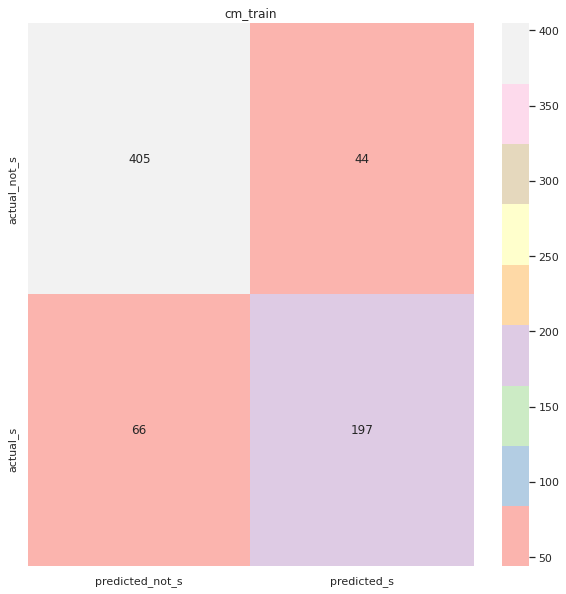

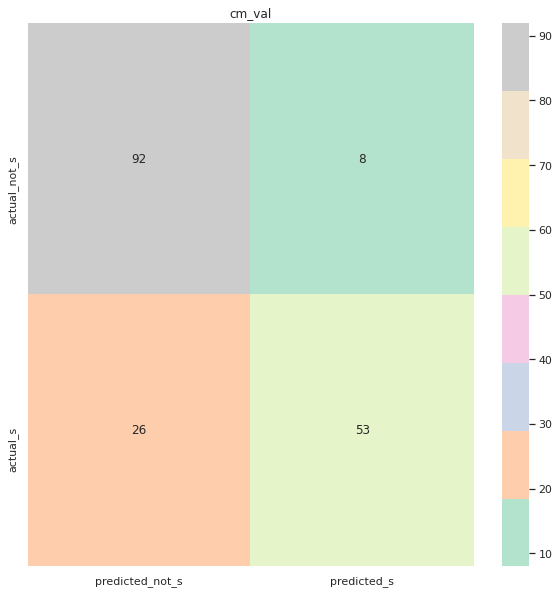

In [56]:
# lot confusion matrix of train and val as heatmaps in seaborn
cm_train_df = pd.DataFrame(cm_train, index=['actual_not_s', 'actual_s'], columns=['predicted_not_s', 'predicted_s'])
cm_val_df = pd.DataFrame(cm_val, index=['actual_not_s', 'actual_s'], columns=['predicted_not_s', 'predicted_s'])

sns.set(font_scale=1)
plt.figure(figsize = (10,10))
fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
fig.set_title("cm_train")
plt.show()
print()
plt.figure(figsize = (10,10))
fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
fig.set_title("cm_val")
plt.show()

true positives (TP): These are cases in which we predicted yes (they survived), and they did survive.

true negatives (TN): We predicted no, and they don't survive.

false positives (FP): We predicted yes, but they don't actually survive. (Also known as a "Type I error.")

false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [57]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')

Train: precision 0.82, recall 0.75, specificity 0.90, fpr 0.10, accuracy 0.85
Val:   precision 0.87, recall 0.67, specificity 0.92, fpr 0.08, accuracy 0.81


In [58]:
# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

print(f'Train: f1 {f1(cm_train):.2f}, balanced_accuracy {balanced_accuracy(cm_train):.2f}')
print(f'Val:   f1 {f1(cm_val):.2f}, balanced_accuracy {balanced_accuracy(cm_val):.2f}')

Train: f1 0.78, balanced_accuracy 0.83
Val:   f1 0.76, balanced_accuracy 0.80


Recall: What proportion of actual positives was identified correctly?

Precision: What proportion of positive identifications was actually correct?

F Score: This is a weighted average of the true positive rate (recall) and precision. 

Aaccuracy: The percentage of correct predictions out of all the data.

# Final Model

If we think about it, the passenger chance of surviving the Titanic shipwreck depends on its surrounding: how many people are around him, where is he located on the ship, how many family member he has etc.

For that reason, we will use KNN (K-Nearest Neighbours) for our final model.

In [59]:
# Select hyper-parameters to KNN model on full data
hyper_parameters = {'n_neighbors': list(range(1, 20)), 'weights': ('uniform', 'distance'),
                     'p':(1, 2)}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_encoded, t)
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

gs_neigh_model 0.8249576297784195
best params {'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}


In [60]:
from sklearn.neighbors import KNeighborsRegressor
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(n_neighbors=5, weights='distance'), hyper_parameters).fit(X_encoded, t)
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

gs_neigh_model 0.36698844013410825
best params {'n_neighbors': 17}


Clearly we will choose KNeighborsClassifier.

In [61]:
gs_model.best_params_

{'alpha': 0.001,
 'eta0': 0.01,
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'penalty': 'l2'}

In [62]:
final_model = AdaBoostClassifier(**ada_gs.best_params_, random_state=1).fit(X_encoded, t)

In [71]:
print('train accuracy: ', final_model.score(X_encoded, t))
print('val accuracy: ', final_model.score(x_val, t_val))

train accuracy:  0.9068462401795735
val accuracy:  0.8938547486033519


In [63]:
knn_model = KNeighborsClassifier(**gs_neigh_model.best_params_).fit(X_encoded, t)
print('train accuracy:', knn_model.score(X_encoded, t))
print('val accuracy:', knn_model.score(x_val, t_val))

train accuracy: 0.8372615039281706
val accuracy: 0.8044692737430168


In [66]:
test_encode = pd.DataFrame(ct.fit_transform(test_df))

In [72]:
y_pred = final_model.predict(test_encode).astype('int64')

In [69]:
test_df['PassengerId'] = test_df_EX3['PassengerId']

In [73]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('AdaBoostingSubmission.csv', index=False)

![image](https://user-images.githubusercontent.com/59430912/103633368-4e9eb780-4f4e-11eb-94ee-904b98474588.png)


![image](https://user-images.githubusercontent.com/59430912/103633457-6bd38600-4f4e-11eb-8c3a-bab3eb56f470.png)

---
# Conclusion

After trying different models and hyper-parameters we see that the best result we get is when we use KNN model.

While using Grid search we found the best hyper-parameters and the best features that our dataset has.

Although in the final model we didn't use the selected features as we didn't see too much difference.

## Sources

[Aviad Malachi's Notebooks](https://github.com/aviasd/Machine-Learning-Practices-Afeka-2020)